In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# constantes
MAX_CONCENTRATION = 5 #g/L

CTAB_AGGREGATION = 95 #https://en.wikipedia.org/wiki/Cetrimonium_bromide
SDS_AGGREGATION = 62 #https://en.wikipedia.org/wiki/Sodium_dodecyl_sulfate
DTAB_AGGREGATION = 55 #https://doi.org/10.1021/jp013813y



CTAB_CMC = 1.26 #g/L #DOI: 10.1002/app.51725 #Concentração micelar critica
SDS_CMC = 2.36 #g/L #(8.2 * 288.372)/1000 #https://en.wikipedia.org/wiki/Sodium_dodecyl_sulfate #menor que CTAB
DTAB_CMC = 4.59 #g/L (14.9 * 308.34)/1000 #https://doi.org/10.1021/jp013813y, https://pubchem.ncbi.nlm.nih.gov/compound/Dodecyltrimethylammonium-bromide (massa molar)


In [3]:
#n = numero total de moléculas de surfactantes / L
#n_c = concentracao micelar critica (micelas/L)
#m/aggregation_number = número ideal de moléculas de surfactante para formar UMA micela

numero_micelas = lambda n, n_c, m : 0 if n < n_c else n/m

In [4]:
CTAB_conc = np.linspace(0, MAX_CONCENTRATION, num=500)
CTAB_micelas_litro = [numero_micelas(n, CTAB_CMC, CTAB_AGGREGATION) for n in CTAB_conc]

SDS_conc = np.linspace(0, MAX_CONCENTRATION, num=500)
SDS_micelas_litro = [numero_micelas(n, SDS_CMC, SDS_AGGREGATION) for n in SDS_conc]

DTAB_conc = np.linspace(0, MAX_CONCENTRATION, num=500)
DTAB_micelas_litro = [numero_micelas(n, DTAB_CMC, DTAB_AGGREGATION) for n in DTAB_conc]


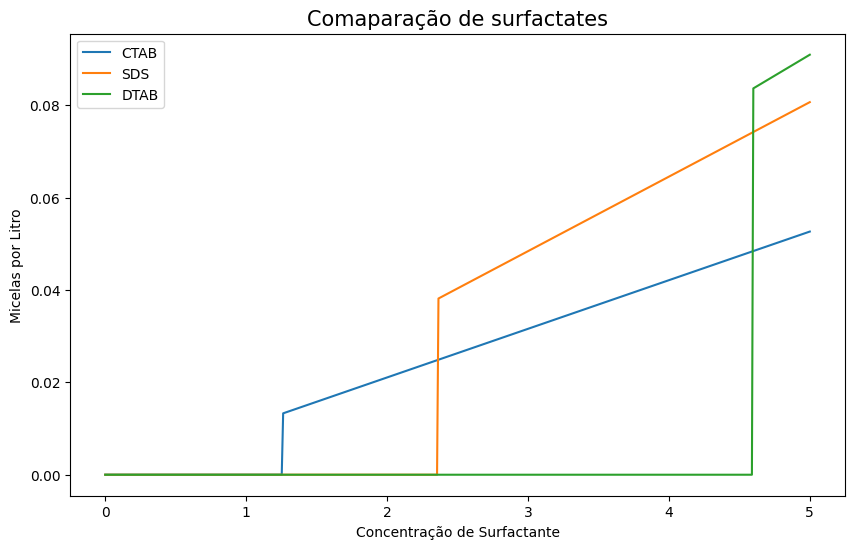

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=CTAB_conc,y=CTAB_micelas_litro,label="CTAB")
sns.lineplot(x=SDS_conc,y=SDS_micelas_litro,label = "SDS")
sns.lineplot(x=DTAB_conc,y=DTAB_micelas_litro,label = "DTAB")
ax.set_title("Comaparação de surfactates",fontsize=15) #define o título do gráfico
ax.set_xlabel("Concentração de Surfactante")
ax.set_ylabel("Micelas por Litro")
plt.legend()
#plt.xticks(xticks_list)
fig.get_figure()
fig.savefig("comparacao_surfactantes.png")

### Falar sobre a cabeça polar, tamanho de cadeia, CMC e numero de agregação (relação entre eles). SDS é BEM DIFERENTE do CTAB e o DTAB.